# Oura calls but now as a function

In [88]:
import datetime
end_date = (datetime.date.today()) #today
start_date = (end_date + datetime.timedelta(days=-1))
start_date = str(start_date)
end_date = str(end_date)
print (start_date, end_date)

2022-01-25 2022-01-26


In [89]:
import notebooks_config
from oura import OuraClient
#I store all my credentials in a notebooks_config.py file. 
#This file is then included in the .gitignore list so I can share the notebooks on GitHub.  

def oura_load(start_date, end_date):
    oura_pat = notebooks_config.oura_pat #
    oura_client_id = notebooks_config.oura_client_id
    oura_client_secret = notebooks_config.oura_client_secret

    client = OuraClient(personal_access_token=oura_pat)
    oura = OuraClient(oura_client_id, oura_client_secret, oura_pat)
    result = oura.sleep_summary(start= start_date, end= end_date)
    data = result['sleep'][0] #select the first item from the list
    return data
print(oura_load(start_date, end_date))

{'summary_date': '2022-01-25', 'period_id': 0, 'is_longest': 1, 'timezone': 60, 'bedtime_end': '2022-01-26T07:17:27+01:00', 'bedtime_start': '2022-01-25T23:52:27+01:00', 'breath_average': 15.25, 'duration': 26700, 'total': 24810, 'awake': 1890, 'rem': 7380, 'deep': 7890, 'light': 9540, 'midpoint_time': 13680, 'efficiency': 93, 'restless': 19, 'onset_latency': 810, 'hr_5min': [61, 62, 63, 63, 61, 61, 61, 60, 61, 61, 61, 59, 58, 0, 0, 0, 63, 61, 61, 61, 61, 62, 62, 62, 64, 61, 60, 61, 61, 63, 66, 64, 63, 64, 63, 63, 62, 62, 62, 60, 61, 61, 60, 59, 60, 61, 62, 65, 63, 62, 61, 61, 61, 60, 61, 61, 62, 61, 61, 62, 61, 61, 59, 59, 60, 58, 58, 59, 59, 59, 59, 59, 60, 62, 60, 0, 0, 60, 60, 59, 61, 62, 62, 63, 60, 61, 61, 61, 66, 59], 'hr_average': 61.14, 'hr_lowest': 58.0, 'hypnogram_5min': '42422221111124422221111211111333333211112222223333333222111113222211123333333332233322334', 'rmssd': 27, 'rmssd_5min': [21, 18, 25, 26, 31, 39, 42, 44, 45, 43, 44, 53, 36, 0, 0, 0, 27, 22, 24, 27, 26, 23, 3

In [43]:
def stages(start_date,end_date):
    my_stages = []
    data = oura_load(start_date, end_date)
    awake = data['awake']/60
    rem = data['rem']/60
    light=data['light']/60
    deep= data['deep']/60
    my_stages.append(awake)
    my_stages.append(rem)
    my_stages.append(light)
    my_stages.append(deep)
    return my_stages
stages(str(start_date), str(end_date))

[117.5, 145.5, 243.0, 92.0]

In [6]:
def stats(start_date, end_date):
    data=oura_load(start_date, end_date)
    breath = data['breath_average']
    temp_dev = data['temperature_deviation']
    restless = data['restless']
    return breath, temp_dev, restless
stats(start_date, end_date)

(14.875, -0.18, 21)

In [7]:
from dateutil import parser
def start_time(start_date, end_date):
    #get the start and endtime as strings
    data = oura_load(start_date, end_date)
    start_time = data['bedtime_start']
    end_time = data['bedtime_end']
    # convert strings to datetime using dateutil
    start_time_dt = parser.parse(start_time)
    end_time_dt = parser.parse(end_time)
    return start_time_dt
#('start time is '+ str(start_time_dt) + ' and end time is ' + str(end_time_dt))
start_time(start_date, end_date)

datetime.datetime(2022, 1, 4, 22, 56, 20, tzinfo=tzoffset(None, 3600))

In [8]:
def end_time(start_date, end_date):
    #get the start and endtime as strings
    data = oura_load(start_date, end_date)
    start_time = data['bedtime_start']
    end_time = data['bedtime_end']
    # convert strings to datetime using dateutil
    start_time_dt = parser.parse(start_time)
    end_time_dt = parser.parse(end_time)
    return end_time_dt
#('start time is '+ str(start_time_dt) + ' and end time is ' + str(end_time_dt))
end_time(start_date, end_date)

datetime.datetime(2022, 1, 5, 8, 36, 20, tzinfo=tzoffset(None, 3600))

In [15]:
def hypnogram():
    #get the hypnogram as one long string
    data = oura_load(start_date, end_date)
    hypnogram = data['hypnogram_5min']
    # convert the hypnogram to a list of strings
    string_list=[]
    string_list[:0]=hypnogram
    # convert the list of strings to a list of integers
    my_stages=[] #create an empty list for the sleep stages
    for i in range(len(string_list)):
        integer = int(string_list[i])
        my_stages.append(integer)
    return my_stages
print(hypnogram()) #call the function 

[4, 2, 2, 2, 3, 3, 1, 4, 3, 3, 4, 4, 4, 2, 4, 2, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 4, 4, 4]


In [130]:
awake = hypnogram().count(4)
print(awake*5)

25


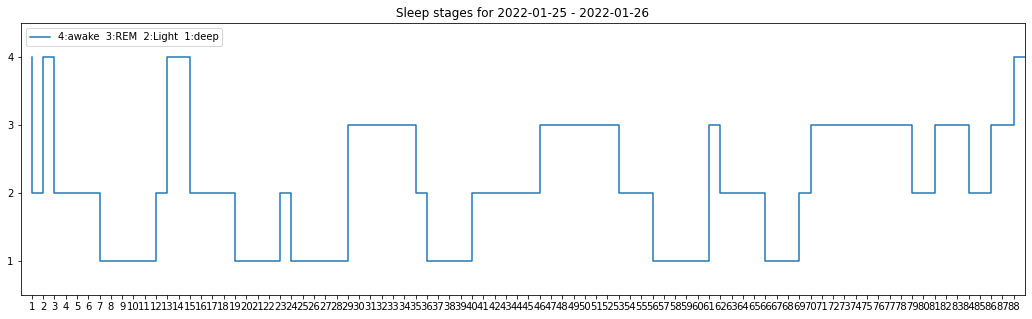

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# make data
list_range = len(hypnogram())
x = []
for i in range (list_range):
    x.append(i+1)
y = hypnogram()
# plot
fig, ax = plt.subplots(figsize =(18,5))
#plt.figure(figsize =(10, 7))
ax.step(x, y, linewidth=1.5, label = 'sleepstage')
ax.set(xlim=(0, list_range), xticks=np.arange(1, list_range),
       ylim=(0.5, 4.5), yticks=np.arange(1,5))
ax.set_title('Sleep stages for '+str(start_date)+' - '+str(end_date))
ax.legend(['4:Awake  3:REM  2:Light  1:Deep'], loc='upper left')
plt.show()

In [10]:
import datetime
def startintervals(start_date, end_date):
    start_time_dt = start_time(start_date, end_date)
    time_change = datetime.timedelta(minutes=5)
    my_startivs = [start_time_dt]
    new_iv=start_time_dt
    my_stages = hypnogram()
    for i in range(len(my_stages)-1):
        new_iv= new_iv+time_change
        my_startivs.append(new_iv)
    return my_startivs
print(startintervals(start_date, end_date))

[datetime.datetime(2022, 1, 4, 22, 56, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 1, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 6, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 11, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 16, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 21, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 26, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 31, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 36, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 41, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 46, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 51, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 4, 23, 56, 20, tzinfo=tzoffset(None, 3600)), datetime.datetime(2022, 1, 5, 0, 1, 20, tzinfo=tzoffset(None, 360

In [76]:
def hr():
    data = oura_load(start_date, end_date)
    my_hr = data['hr_5min']
    return my_hr
print(hr())

[64, 62, 64, 64, 63, 63, 63, 60, 60, 60, 0, 0, 61, 62, 61, 61, 62, 62, 62, 61, 60, 60, 59, 58, 58, 59, 58, 58, 59, 58, 57, 57, 56, 56, 58, 55, 54, 55, 54, 54, 55, 55, 55, 55, 60, 62, 61, 60, 57, 59, 56, 57, 57, 56, 55, 57, 55, 56, 56, 57, 57, 56, 57, 58, 58, 58, 59, 57, 57, 56, 58, 56, 57, 56, 57, 57, 58, 58, 58, 58, 58, 57, 57, 59, 58, 59, 59, 59, 58, 59, 57, 58, 58, 59, 58, 58, 59, 60, 60, 0, 0, 60, 59, 59, 60, 65, 0, 0]


[61. 62. 63. 63. 61. 61. 61. 60. 61. 61. 61. 59. 58. nan nan nan 63. 61.
 61. 61. 61. 62. 62. 62. 64. 61. 60. 61. 61. 63. 66. 64. 63. 64. 63. 63.
 62. 62. 62. 60. 61. 61. 60. 59. 60. 61. 62. 65. 63. 62. 61. 61. 61. 60.
 61. 61. 62. 61. 61. 62. 61. 61. 59. 59. 60. 58. 58. 59. 59. 59. 59. 59.
 60. 62. 60. nan nan 60. 60. 59. 61. 62. 62. 63. 60. 61. 61. 61. 66. 59.]


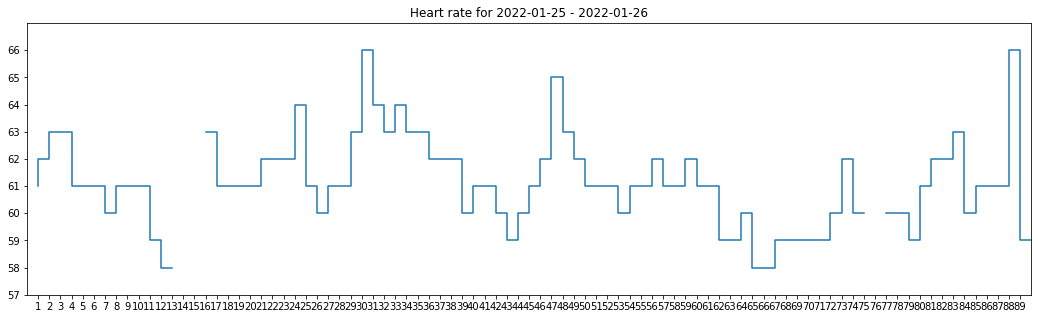

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# get the x and y data
x = []
for i in range (len(hr())):
    x.append(i+1)
y = hr()
#replacing zeros with nan
y_array = np.array(y, dtype=np.double)# load list y into a numpy array
y_array[y_array==0 ] = np.nan

hr_max = max(y_array)
hr_min = min(y_array)
print(y_array)
# plot
fig, ax = plt.subplots(figsize =(18,5))
ax.step(x, y_array, linewidth=1.5)
ax.set(xlim=(0, list_range), xticks=np.arange(1, list_range),
       ylim=(hr_min-1, hr_max+1), yticks=np.arange(hr_min-1,hr_max+1))
ax.set_title('Heart rate for '+str(start_date)+' - '+str(end_date))
plt.show()

In [71]:
def HRV():
    data = oura_load(start_date, end_date)
    my_HRV = data['rmssd_5min']
    return my_HRV
print(HRV())

[22, 20, 35, 34, 28, 33, 30, 27, 37, 35, 0, 0, 40, 49, 38, 41, 52, 39, 29, 27, 23, 34, 39, 35, 38, 45, 48, 51, 51, 48, 51, 54, 49, 41, 50, 61, 58, 49, 36, 42, 46, 45, 42, 47, 41, 26, 39, 29, 33, 27, 54, 53, 44, 46, 45, 43, 40, 38, 36, 38, 32, 26, 26, 22, 24, 23, 36, 24, 19, 31, 38, 23, 26, 32, 36, 26, 25, 26, 39, 43, 45, 44, 34, 30, 39, 30, 32, 26, 29, 37, 41, 32, 31, 37, 37, 35, 37, 39, 75, 0, 0, 35, 36, 33, 32, 19, 0, 0]


In [128]:
import matplotlib.pyplot as plt
import numpy as np
# get the x and y data
list_range = len(HRV())
x = []
for i in range (list_range):
    x.append(i+1)
y = HRV()
average = sum(HRV()/len(HRV()))
              
average_list = []
for i in range (list_range):
    average_list.append(average)
#replacing zeros with nan
y_array = np.array(y, dtype=np.double)
y_array[y_array==0 ] = np.nan
HRV_max = max(y_array)#getting max and min values for the axis
HRV_min = min(y_array)
# plot
fig, ax= plt.subplots(figsize =(18,5))
ax.plot(x, y_array, linewidth=1.5, alpha=0.7)
ax.plot(average, linewidth=1)
ax.set_title('HRV for '+str(start_date)+' - '+str(end_date))

plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [98]:
import pandas as pd

def create_df(start_date, end_date):
    sleep_df = pd.DataFrame() #create an empty data frame

    # Add the lists to the dataframe
    sleep_df['Start_time']=startintervals(start_date, end_date)
    sleep_df['Stage']= hypnogram()
    sleep_df['hr']=pd.Series(hr())
    sleep_df['HRV']=pd.Series(HRV())
    return sleep_df
create_df(start_date, end_date)

NameError: name 'startintervals' is not defined

In [14]:
def deepsleep(start_date, end_date):
    deep_sleep = hypnogram().count(1) 
    deep_sleep_perc= round((deep_sleep/len(hypnogram())*100),2)
    return deep_sleep*5, deep_sleep_perc
deepsleep(start_date, end_date)[0]

65

In [15]:
import datetime
def sleep_total(start_date, end_date):
    my_start_time = start_time(start_date, end_date)
    my_end_time = end_time(start_date, end_date)
    sleep_total = my_end_time - my_start_time
    return print(sleep_total)
sleep_total(start_date, end_date)

9:40:00


In [21]:
data = oura_load(start_date, end_date)
sleep = [] 
data = oura_load(start_date, end_date)
awake =data['awake']/60
sleep.append(awake)
#    rem = data['rem']/60
#    light=data['light']/60
#   deep= data['deep']/60
sleep

[84.5]

In [38]:
import datetime
today = datetime.date.today()
deep_list = []
for i in range(7):
    end_date = today - datetime.timedelta(days=i)
    start_date= today - datetime.timedelta(days=i+1)
    deep = oura_load(str(start_date), str(end_date))['deep']
    rem = oura_load(str(start_date), str(end_date))['rem']
    deep_list.append(deep)
    deep_list.append(rem)
print(deep_list)

[3960, 8550, 4830, 9000, 3570, 7140, 6690, 7770, 3030, 7110, 7260, 5520, 3840, 9840]


In [47]:
import datetime
today = datetime.date.today()
week_list = []
stages_dict = {}
for i in range(7):
    end_date = today - datetime.timedelta(days=i)
    start_date= today - datetime.timedelta(days=i+1)
    for i in range(1):
        stages_dict['end_date'] = str(end_date)
        stages_dict['awake'] = oura_load(str(start_date), str(end_date))['awake']
        stages_dict['light'] = oura_load(str(start_date), str(end_date))['light']
        stages_dict['rem'] = oura_load(str(start_date), str(end_date))['rem']
        stages_dict['deep'] = oura_load(str(start_date), str(end_date))['deep']
        #print(stages_dict)
    week_list.append(stages_dict)
print(week_list)

[{'end_date': '2022-01-05', 'awake': 5070, 'light': 16050, 'rem': 9840, 'deep': 3840}, {'end_date': '2022-01-05', 'awake': 5070, 'light': 16050, 'rem': 9840, 'deep': 3840}, {'end_date': '2022-01-05', 'awake': 5070, 'light': 16050, 'rem': 9840, 'deep': 3840}, {'end_date': '2022-01-05', 'awake': 5070, 'light': 16050, 'rem': 9840, 'deep': 3840}, {'end_date': '2022-01-05', 'awake': 5070, 'light': 16050, 'rem': 9840, 'deep': 3840}, {'end_date': '2022-01-05', 'awake': 5070, 'light': 16050, 'rem': 9840, 'deep': 3840}, {'end_date': '2022-01-05', 'awake': 5070, 'light': 16050, 'rem': 9840, 'deep': 3840}]


## Weekly data: sleep stages

In [59]:
# create the function to get the data for the sleep stages
import datetime
def week_list():
    today = datetime.date.today()
    my_week_list = []
    for i in range(7):
        end_date = today - datetime.timedelta(days=i)
        start_date= today - datetime.timedelta(days=i+1)
        day_list = []
        for i in range(1):
            #day_list.append(str(end_date))
            day_list.append(oura_load(str(start_date), str(end_date))['awake'])
            day_list.append(oura_load(str(start_date), str(end_date))['light'])
            day_list.append(oura_load(str(start_date), str(end_date))['rem'])
            day_list.append(oura_load(str(start_date), str(end_date))['deep'])
            my_week_list.append(day_list)
    return my_week_list
week_list()

[[9090, 13350, 5970, 5970],
 [3540, 15360, 7680, 4680],
 [2340, 10920, 7650, 6270],
 [4770, 12810, 6750, 4170],
 [1830, 13410, 4500, 3240],
 [4860, 15660, 7530, 5670],
 [3870, 8610, 4950, 6510]]

In [60]:
import datetime
today = datetime.date.today()
deep_list = []
for i in range(7):
    end_date = today - datetime.timedelta(days=i)
    start_date= today - datetime.timedelta(days=i+1)
    deep = oura_load(str(start_date), str(end_date))['deep']
    deep_list.append(deep)
print(deep_list)
my_sum = sum(deep_list)
print('Total deep sleep last week was: '+ str(my_sum / 3600) +' hours.')
deep_ave_day = (my_sum / (7*60))
print(deep_ave_day)

[5970, 4680, 6270, 4170, 3240, 5670, 6510]
Total deep sleep last week was: 10.141666666666667 hours.
86.92857142857143


In [61]:
week_sum =[]
for i in range (len(my_week_list)):
    day_sum =sum(my_week_list[i])
    week_sum.append(day_sum)
    print(day_sum/3600)
week_total = sum(week_sum)/3600
print(week_total)

7.55
7.916666666666667
6.383333333333334
9.366666666666667
6.65
7.733333333333333
9.966666666666667
55.56666666666667


In [62]:
deep_week = []
for i in range (len(my_week_list)):
    deep_week.append(my_week_list[i][3])
Sum = sum(deep_week)/3600
print('Total deep sleep is '+ str(Sum) +' hours per week.')

Total deep sleep is 9.85 hours per week.


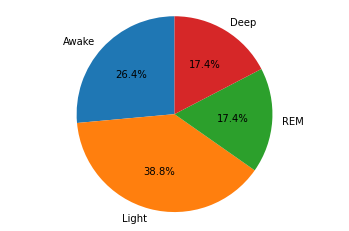

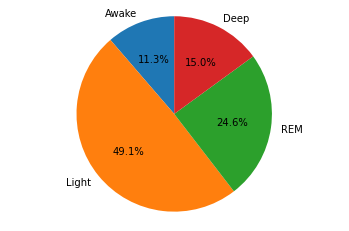

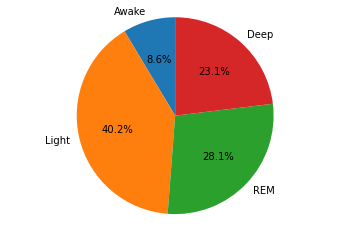

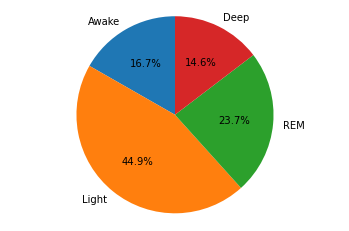

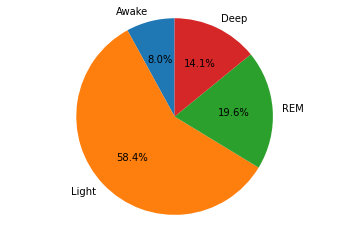

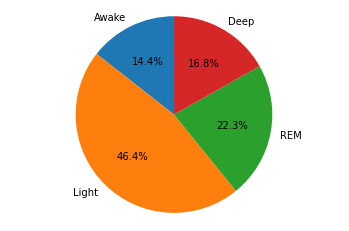

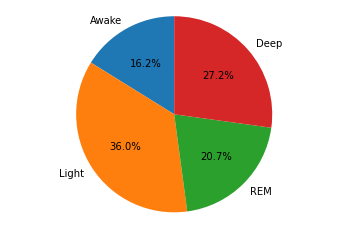

In [64]:
#Create the graphs for last week
import matplotlib.pyplot as plt
labels = 'Awake', 'Light', 'REM', 'Deep'
my_week_list = week_list()
for i in range(7):
    fig1, ax1 = plt.subplots()
    ax1.pie(my_week_list[i], labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle. explode=explode, 
    

## Weekly: stats

use the following stats:
- hr_average
- hr_lowest
- rmssd
- restless

In [95]:
# DO NOT USE IN STREAMLIT APP
import datetime
def week_stats():
    today = datetime.date.today()
    my_week_stats = []
    for i in range(7):
        end_date = today - datetime.timedelta(days=i)
        start_date= today - datetime.timedelta(days=i+1)
        day_stats = []
        for i in range(1):
            #day_list.append(str(end_date))
            day_stats.append(oura_load(str(start_date), str(end_date))['hr_average'])
            day_stats.append(oura_load(str(start_date), str(end_date))['hr_lowest'])
            day_stats.append(oura_load(str(start_date), str(end_date))['rmssd'])
            day_stats.append(oura_load(str(start_date), str(end_date))['restless'])
            my_week_stats.append(day_stats)
    return my_week_stats
week_stats()

[[58.41, 54.0, 36, 19],
 [59.77, 55.0, 34, 19],
 [60.86, 58.0, 33, 26],
 [66.67, 62.0, 23, 21],
 [61.59, 57.0, 32, 22],
 [61.47, 58.0, 30, 24],
 [60.47, 55.0, 38, 27]]

In [3]:
import datetime
def hrave_week():
    today = datetime.date.today()
    hrave_week_list = []
    for i in range(7):
        end_date = today - datetime.timedelta(days=i)
        start_date= today - datetime.timedelta(days=i+1)
        for i in range(1):
            hrave_week_list.append(oura_load(str(start_date), str(end_date))['hr_average'])
    hrave_week_ave = round(sum(hrave_week_list)/len(hrave_week_list),2)
    hrave_week_max = max(hrave_week_list)
    hrave_week_min = min(hrave_week_list)
    return hrave_week_list, hrave_week_ave, hrave_week_max, hrave_week_min 
hrave_week()

([58.41, 59.77, 60.86, 66.67, 61.59, 61.47, 60.47], 61.32, 66.67, 58.41)

In [4]:
import datetime
def hrlow_week():
    today = datetime.date.today()
    hrlow_week_list = []
    for i in range(7):
        end_date = today - datetime.timedelta(days=i)
        start_date= today - datetime.timedelta(days=i+1)
        for i in range(1):
            hrlow_week_list.append(oura_load(str(start_date), str(end_date))['hr_lowest'])
    hrlow_week_ave = round(sum(hrlow_week_list)/len(hrlow_week_list),2)
    hrlow_week_max = max(hrlow_week_list)
    hrlow_week_min = min(hrlow_week_list)
    return hrlow_week_list, hrlow_week_ave, hrlow_week_max, hrlow_week_min
hrlow_week()

([54.0, 55.0, 58.0, 62.0, 57.0, 58.0, 55.0], 57.0, 62.0, 54.0)

In [10]:
import datetime
def HRV_week():
    today = datetime.date.today()
    HRV_week_list = []
    for i in range(7):
        end_date = today - datetime.timedelta(days=i)
        start_date= today - datetime.timedelta(days=i+1)
        for i in range(1):
            HRV_week_list.append(oura_load(str(start_date), str(end_date))['rmssd'])
    HRV_week_ave = round(sum(HRV_week_list)/len(HRV_week_list),2)
    HRV_week_max = max(HRV_week_list)
    HRV_week_min = min(HRV_week_list)
    return HRV_week_list, HRV_week_ave, HRV_week_max, HRV_week_min
HRV_week()

([36, 34, 33, 23, 32, 30, 38], 32.29, 38, 23)

In [11]:
import datetime
def restless_week():
    today = datetime.date.today()
    restless_week_list = []
    for i in range(7):
        end_date = today - datetime.timedelta(days=i)
        start_date= today - datetime.timedelta(days=i+1)
        for i in range(1):
            restless_week_list.append(oura_load(str(start_date), str(end_date))['restless'])
    restless_week_ave = round(sum(restless_week_list)/len(restless_week_list),2)
    restless_week_max = max(restless_week_list)
    restless_week_min = min(restless_week_list)
    return restless_week_list, restless_week_ave, restless_week_max, restless_week_min
restless_week()

([19, 19, 26, 21, 22, 24, 27], 22.57, 27, 19)

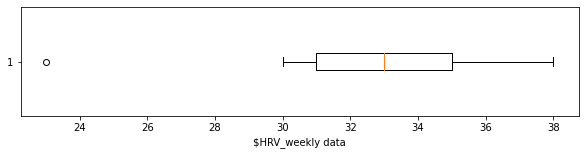

In [14]:
# Creating a plot for the week
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 2))
#plt.boxplot(restless_week()[0], vert=False)
plt.boxplot(HRV_week()[0], vert=False)
plt.xlabel(r'$HRV_weekly data') # x label 
plt.show()